In [1]:
import pandas as pd

cnPapers = pd.read_excel("County_Data.xlsx",names=["report","Time"])
cnPapers.head()

,report,Time
220923083512009378.txt,各乡、镇人民政府，公安经济开发区管委会，江南新区管委会，县政府各部门：为贯彻落实《国务院关于...,1
P020220719538510062519.txt,门沙黎族自治县人民政府办公室文件白府办 ( 201 8 ] 62 号白沙黎族自治县人民政府...,1
P020220719539598489513.txt,门沙黎族自治县人民政府办公室文件白府办 ( 201 8 ] 62 号白沙黎族自治县人民政府...,1
request.txt,益赫政发〔2018〕9 号益阳市赫山区人民政府关于加速推进粮食生产高质量发展的实 施 意...,1
request1.txt,HSDR－2018－00020益赫政发〔2018〕26 号益阳市赫山区人民政府关于印发《赫山...,1


In [2]:
## 打印信息
cnPapers.info()
## 检查是否有空值
cnPapers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2609 entries, 220923083512009378.txt to 龙口市人民政府关于印发《龙口市农村生活污水处理设施运行维护管理办法细则》的通知.txt
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   report  2592 non-null   object
 1   Time    2609 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 61.1+ KB


report    17
Time       0
dtype: int64

In [3]:
## 删除空值
cnPapers.dropna(inplace = True)
## 检查是否有空值
cnPapers.isnull().sum()
## 打印信息
cnPapers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2592 entries, 220923083512009378.txt to 黟县人民政府办公室关于印发黟县县级粮食储备管理办法的通知.txt
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   report  2592 non-null   object
 1   Time    2592 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.8+ KB


In [4]:
# 时间字段的类型转换，从float转化为int
cnPapers[["Time"]] = cnPapers[["Time"]].astype(int)

In [5]:
## 按时间排序
cnPapers.sort_values("Time",inplace=True)
cnPapers.head()

,report,Time
220923083512009378.txt,各乡、镇人民政府，公安经济开发区管委会，江南新区管委会，县政府各部门：为贯彻落实《国务院关于...,1
洛川县人民政府办公室关于推进农村土地制度改革工作的实施方案--洛川县人民政府1686282726000.txt,洛川县人民政府办公室关于推进农村土地制度改革工作的实施方案索引号发文宇号发布机构116106...,1
浏阳市人民政府 关于严厉打击电鱼、毒鱼、炸鱼等 非法捕捞行为的通告-浏阳市政府门户网站.txt,中国政府网 湖南政府网 长沙政府网 繁體 无障碍浏览 长者服务专区 登录浏阳市人民政府PEO...,1
浏阳市人民政府关于加强株树桥水库饮用水水源保护的通告-浏阳市政府门户网站.txt,中国政府网 湖南政府网 长沙政府网 繁體 无障碍浏览 长者服务专区 登录浏阳市人民政府PEO...,1
浏阳市人民政府关于实施禁渔制度的通告-浏阳市政府门户网站.txt,中国政府网 湖南政府网 长沙政府网 繁體 无障碍浏览 长者服务专区 登录浏阳市人民政府PEO...,1


In [6]:
## 统计不同年份文献数量
cnPapers["Time"].value_counts() 

Time
1    671
4    670
3    526
2    409
5    316
Name: count, dtype: int64

In [7]:
import jieba

## 加载自定义词典

jieba.load_userdict("Coudict.txt")
stopLists = list(pd.read_csv("Coustop.txt",names=["w"], encoding="utf-8",delimiter='\t').w)

def paperCut(text):
    return [w for w in jieba.cut(text) if w not in stopLists and len(w)>1]
wordLists = [paperCut(paper) for paper in cnPapers.report]
#wordLists[0]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.580 seconds.
Prefix dict has been built successfully.


In [8]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

## 构建词篇矩阵
cnDict = Dictionary(wordLists)
cnCorpus = [cnDict.doc2bow(text) for text in wordLists]

## 进行TF-IDF计算
cn_tfidf_model = TfidfModel(cnCorpus)
cn_corpus_tfidf = cn_tfidf_model[cnCorpus]
cn_corpus_tfidf[0]

[(0, 0.018709418394882788),
 (1, 0.010524266954825792),
 (2, 0.019332989558543155),
 (3, 0.04626915000054282),
 (4, 0.039575110464420776),
 (5, 0.006765022829445278),
 (6, 0.02147986299714882),
 (7, 0.027937470076667963),
 (8, 0.021067435080581055),
 (9, 0.04961537105839417),
 (10, 0.02611964114286577),
 (11, 0.04394000686342775),
 (12, 0.10871106311232422),
 (13, 0.007519333147812337),
 (14, 0.03281021065619201),
 (15, 0.023401738826097467),
 (16, 0.017434363746188453),
 (17, 0.035342952125435034),
 (18, 0.015834560564102557),
 (19, 0.022097350600730432),
 (20, 0.01953222241711918),
 (21, 0.02078206725081837),
 (22, 0.05085717073362103),
 (23, 0.05331463308170202),
 (24, 0.03163328299970465),
 (25, 0.05314364460539252),
 (26, 0.35157997170660055),
 (27, 0.03916520368159054),
 (28, 0.023539889991725595),
 (29, 0.032791985028269244),
 (30, 0.02812660387559754),
 (31, 0.011220179358084425),
 (32, 0.015377931770466887),
 (33, 0.05042740955952842),
 (34, 0.06172932421999107),
 (35, 0.02466

In [9]:
from gensim.models import ldaseqmodel
## 定义时间切片2021 
time_slice = [671,409,526,670,316]


In [28]:
goodLdaseq = ldaseqmodel.LdaSeqModel(corpus = cn_corpus_tfidf, 
                                     id2word = cnDict, 
                                     time_slice = time_slice, 
                                     num_topics = 6,
                                     random_state=100)

D:\Users\Lenovo\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:297: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)


In [31]:
goodLdaseq.print_topics(time = 0,top_terms=100)##第一个时间段的8个主题情况

[[('供水', 0.022735103624238855),
  ('污染', 0.01624001699253133),
  ('饮用水', 0.012239158425336065),
  ('土壤污染', 0.011229763266779602),
  ('水源', 0.011218231136457315),
  ('用水', 0.011111906434916639),
  ('排放', 0.010118514876800476),
  ('水价', 0.009640520777214607),
  ('水质', 0.009229596251462234),
  ('防治', 0.009186643756465048),
  ('饮水', 0.008844674237452358),
  ('生态环境', 0.008350494521096404),
  ('生态', 0.008258205230601197),
  ('环境保护', 0.008193141224269647),
  ('土壤环境', 0.007956786213725925),
  ('保护区', 0.007671222176728741),
  ('水源地', 0.007084314059929286),
  ('治理', 0.006871015783781665),
  ('管控', 0.006517950130780138),
  ('安全工程', 0.006295970111573351),
  ('排污口', 0.00603991787921614),
  ('环境', 0.0058409957263374996),
  ('地下水', 0.005789400218613017),
  ('清洁', 0.005667107988102434),
  ('污染物', 0.005590381237219711),
  ('保护', 0.005589657593000741),
  ('节水', 0.005509128772180655),
  ('水费', 0.005505926655019658),
  ('集中式', 0.00528806575158807),
  ('水厂', 0.00525290670546002),
  ('工业', 0.005193166590653

In [32]:
goodLdaseq.print_topics(time = 2,top_terms=20)
## 识别主题1在三个阶段的主题内容
'''
goodLdaseq.print_topic_times(topic=0, top_terms=10)
'''

'\ngoodLdaseq.print_topic_times(topic=0, top_terms=10)\n'

In [33]:
## 打印文档主题偏好
doc = goodLdaseq.doc_topics(0) 
print (doc)

[9.88457539e-04 9.88457539e-04 9.88457539e-04 9.88457539e-04
 9.95057712e-01 9.88457539e-04]


In [34]:
## 文档主题概率识别
sim = []
for i in range(cnPapers.report.size):
    sim.append(goodLdaseq.doc_topics(i))
tv = pd.DataFrame(sim)
sim[:9]

[array([9.88457539e-04, 9.88457539e-04, 9.88457539e-04, 9.88457539e-04,
        9.95057712e-01, 9.88457539e-04]),
 array([0.00117054, 0.00117054, 0.00117054, 0.00117054, 0.00117054,
        0.99414728]),
 array([0.00174523, 0.00174523, 0.99127386, 0.00174523, 0.00174523,
        0.00174523]),
 array([0.986701 , 0.0026598, 0.0026598, 0.0026598, 0.0026598, 0.0026598]),
 array([0.00199274, 0.00199274, 0.99003632, 0.00199274, 0.00199274,
        0.00199274]),
 array([0.0016783 , 0.99160848, 0.0016783 , 0.0016783 , 0.0016783 ,
        0.0016783 ]),
 array([0.00135114, 0.00135114, 0.00135114, 0.00135114, 0.99324431,
        0.00135114]),
 array([0.00396795, 0.00396795, 0.00396795, 0.00396795, 0.00396795,
        0.98016024]),
 array([0.00144673, 0.00144673, 0.44630242, 0.22103361, 0.3283238 ,
        0.00144673])]

In [35]:
## 转换成dataFrame
tv = pd.DataFrame(sim)
## 设置阈值
tv[tv<0.0001] = 0
tv.head()

## 阶段划分
period1 = tv.iloc[:time_slice[0]]
period2 = tv.iloc[time_slice[0]:time_slice[1]+time_slice[0]]
period3 = tv.iloc[time_slice[1]+time_slice[0]:time_slice[2]+time_slice[1]+time_slice[0]]
period4 = tv.iloc[time_slice[2]+time_slice[1]+time_slice[0]:time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]]
period5 = tv.iloc[time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]:time_slice[4]+time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]]
print("第一阶段政策数量：",len(period1))
print("第二阶段政策数量：",len(period2))
print("第三阶段政策数量：",len(period3))
print("第四阶段政策数量：",len(period4))
print("第五阶段政策数量：",len(period5))

##每个阶段平均主题支持度 
a=period1.agg("mean")
b=period2.agg("mean")
c=period3.agg("mean")
d=period4.agg("mean")
e=period5.agg("mean")
output=[a,b,c,d,e]
##type(output)


from pandas.core.frame import DataFrame
shu=DataFrame(output)
#=["topic1","topic2","topic3","topic4","topic5"]

#type(shu)
shu=shu.transpose()
shu.columns=["第一阶段","第二阶段","第三阶段","第四阶段","第五阶段"]
shu.index=["topic1","topic2","topic3","topic4","topic5",""]
shu

第一阶段政策数量： 671
第二阶段政策数量： 409
第三阶段政策数量： 526
第四阶段政策数量： 670
第五阶段政策数量： 316


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [25]:
from matplotlib import pyplot as plt
import numpy as np

D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38454 (\N{CJK UNIFIED IDEOGRAPH-9636}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(b

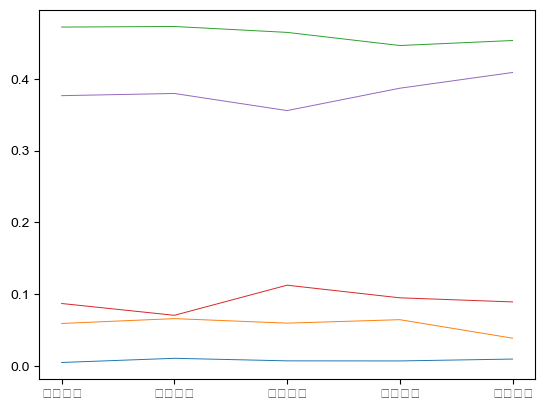

In [26]:
shu1=shu.transpose()
plt.plot(shu1,lw=0.7)
plt.rcParams['font.sans-serif']=['Arial']
#plt.legend()